In [4]:
import pandas as pd 
import numpy as np
# !pip install bertopic
# from bertopic import BERTopic
import re
import string
from nltk.tokenize import TweetTokenizer
import tqdm
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [5]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

In [6]:
df = pd.read_csv('data.csv', index_col=[0])

In [8]:
df = df[['username','lang',	'text','created_at']]

In [9]:
df

,username,lang,text,created_at
0,abbgroupnews,en,New ABB E-mobility home charging solution help...,2023-01-03T15:18:41.000Z
1,abbgroupnews,en,ABB #technology to facilitate #energyefficienc...,2023-01-10T09:57:29.000Z
2,abbgroupnews,en,Better decisions for a greener data center! Ho...,2023-01-11T10:01:06.000Z
3,abbgroupnews,en,ABB Formula E Season 9 goes green in Mexico!\n...,2023-01-12T09:09:45.000Z
4,abbgroupnews,en,The #ABB Decoded #podcast with Frank Muehlon i...,2023-01-13T09:41:43.000Z
...,...,...,...,...
10557,volvocars,en,"@ceguvite We are sorry to hear this, Cristian,...",2023-12-27T11:27:46.000Z
10558,volvocars,en,"@russ_nicol We are sorry to hear this, Russ, p...",2023-12-27T12:30:13.000Z
10559,volvocars,en,"@guydebromhead We are sorry to hear this, plea...",2023-12-27T12:30:40.000Z
10560,volvocars,en,@cpbattersby Hi there we are sorry to hear thi...,2023-12-27T14:15:56.000Z


In [10]:
# Remove texts that are just URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x))

# Remove texts that are just mentions, hashtags, or cashtags
df['text'] = df['text'].apply(lambda x: re.sub(r'(^|\s)@[^\s]+|(^|\s)#[^\s]+|(^|\s)\$[^\s]+', '', x))

C:\Users\valen\AppData\Local\Temp\ipykernel_20716\795694848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x))
C:\Users\valen\AppData\Local\Temp\ipykernel_20716\795694848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: re.sub(r'(^|\s)@[^\s]+|(^|\s)#[^\s]+|(^|\s)\$[^\s]+', '', x))


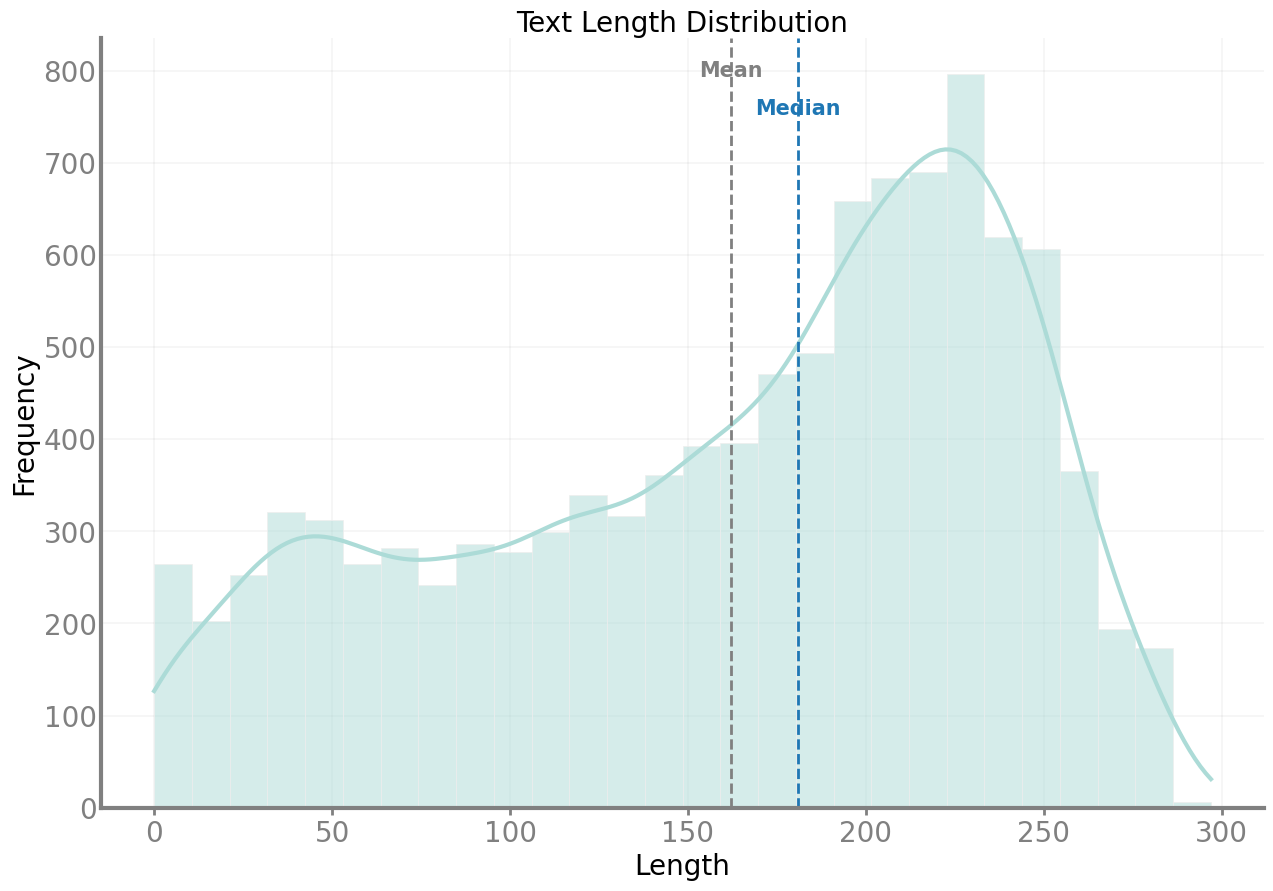

In [29]:
import seaborn as sns

sns.set_palette("icefire", n_colors = len(df.username.unique()))

# Calculate text lengths
df['text_length'] = df['text'].apply(len)

mean_text_length = df.text_length.mean()
median_text_length = df.text_length.median()

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Set the palette
palette = sns.color_palette("icefire", n_colors=len(df.username.unique()))
sns.set_palette(palette)

_, ax = plt.subplots(figsize=(15, 10))

# Create the KDE plot without the legend
g = sns.histplot(data=df, x="text_length", kde=True)
plt.axvline(mean_text_length, color='grey', linestyle='--', linewidth=2)
plt.axvline(median_text_length, color='tab:blue', linestyle='--', linewidth=2)

# Add text annotations for the mean and median
plt.text(mean_text_length, plt.gca().get_ylim()[1] * 0.95, 'Mean', color='grey', ha='center', fontsize=15, weight='bold')
plt.text(median_text_length, plt.gca().get_ylim()[1] * 0.9, 'Median', color='tab:blue', ha='center', fontsize=15, weight='bold')

# Get unique usernames
unique_usernames = df['username'].unique()

# Create custom legend handles
handles = [Patch(color=palette[i], label=unique_usernames[i]) for i in range(len(unique_usernames))]

# Calculate the number of columns based on figure size and number of unique usernames
fig = plt.gcf()
fig_width = fig.get_size_inches()[0]  # Width of the figure in inches
max_legend_columns = int(fig_width // 2)  # Adjust the divisor to control column width
n_columns = min(len(unique_usernames), max_legend_columns)

# Adjust the subplot parameters to make room for the legend above the plot
# plt.subplots_adjust(top=0.8)  # Increase top margin

# Create the legend
# fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=n_columns, frameon=False)

# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set x-axis label and its font size
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title("Text Length Distribution", fontsize=20)

# Show the plot
plt.show()


C:\Users\valen\AppData\Local\Temp\ipykernel_20716\246118828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].apply(len)
C:\Users\valen\AppData\Local\Temp\ipykernel_20716\246118828.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(data=df, x="text_length", hue="username", multiple="stack", legend=False, cut=0)


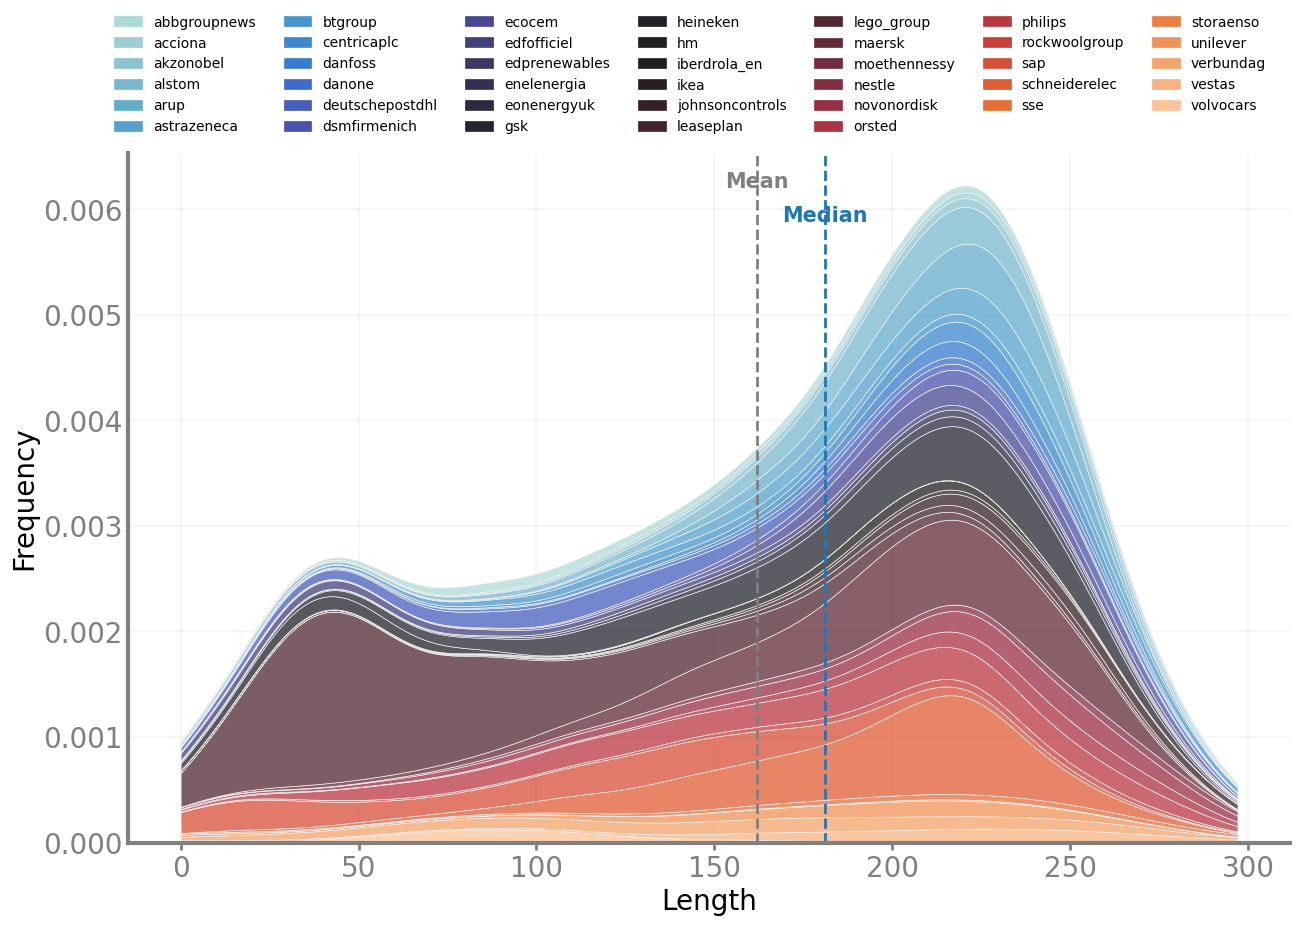

In [26]:
import seaborn as sns

sns.set_palette("icefire", n_colors = len(df.username.unique()))

# Calculate text lengths
df['text_length'] = df['text'].apply(len)

mean_text_length = df.text_length.mean()
median_text_length = df.text_length.median()

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Set the palette
palette = sns.color_palette("icefire", n_colors=len(df.username.unique()))
sns.set_palette(palette)

_, ax = plt.subplots(figsize=(15, 10))

# Create the KDE plot without the legend
g = sns.kdeplot(data=df, x="text_length", hue="username", multiple="stack", legend=False, cut=0)

plt.axvline(mean_text_length, color='grey', linestyle='--', linewidth=2)
plt.axvline(median_text_length, color='tab:blue', linestyle='--', linewidth=2)

# Add text annotations for the mean and median
plt.text(mean_text_length, plt.gca().get_ylim()[1] * 0.95, 'Mean', color='grey', ha='center', fontsize=15, weight='bold')
plt.text(median_text_length, plt.gca().get_ylim()[1] * 0.9, 'Median', color='tab:blue', ha='center', fontsize=15, weight='bold')

# Get unique usernames
unique_usernames = df['username'].unique()

# Create custom legend handles
handles = [Patch(color=palette[i], label=unique_usernames[i]) for i in range(len(unique_usernames))]

# Calculate the number of columns based on figure size and number of unique usernames
fig = plt.gcf()
fig_width = fig.get_size_inches()[0]  # Width of the figure in inches
max_legend_columns = int(fig_width // 2)  # Adjust the divisor to control column width
n_columns = min(len(unique_usernames), max_legend_columns)

# Adjust the subplot parameters to make room for the legend above the plot
plt.subplots_adjust(top=0.8)  # Increase top margin

# Create the legend
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=n_columns, frameon=False)

# Set x and y tick labels font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set x-axis label and its font size
plt.xlabel('Length')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [28]:
import pandas as pd
import re
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# Remove texts that are just URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x))

# Remove texts that are just mentions, hashtags, or cashtags
df['text'] = df['text'].apply(lambda x: re.sub(r'(^|\s)@[^\s]+|(^|\s)#[^\s]+|(^|\s)\$[^\s]+', '', x))

# Filter texts based on length (e.g., keeping texts with more than 10 characters)
min_text_length = 0
df = df[df['text'].apply(len) >= min_text_length]

# Text preprocessing
# Lowercasing
df['text'] = df['text'].str.lower()

In [27]:
df.lang.unique()

array(['en', 'es', 'qme', 'art', 'fr', 'cs', 'zxx', 'da', 'tl', 'pl',
       'ca', 'und', 'it', 'tr', 'pt', 'ar', 'qam', 'in', 'qht', 'fi',
       'ht', 'cy', 'de'], dtype=object)

In [116]:
model = BERTopic(verbose=True)
 
#convert to list 
docs = df.text.to_list()
 
topics, probabilities = model.fit_transform(docs)

2024-04-22 02:33:53,470 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/188 [00:00<?, ?it/s]

2024-04-22 02:34:22,254 - BERTopic - Embedding - Completed ✓
2024-04-22 02:34:22,255 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-22 02:34:29,315 - BERTopic - Dimensionality - Completed ✓
2024-04-22 02:34:29,317 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-22 02:34:29,600 - BERTopic - Cluster - Completed ✓
2024-04-22 02:34:29,608 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-22 02:34:29,923 - BERTopic - Representation - Completed ✓


In [117]:
model.visualize_topics()

In [130]:
model.visualize_barchart(top_n_topics = 20, n_words = 10)

In [119]:
model.visualize_heatmap()

In [132]:
topic_distr, topic_token_distr = model.approximate_distribution(
      docs, window = 4, calculate_tokens=True)

100%|██████████| 7/7 [00:01<00:00,  5.55it/s]


In [133]:
topic_distr

array([[0.12365685, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.513297  , 0.486703  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.71065597, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [139]:
for i in range((20)):
    print(model.get_representative_docs(topic=i))

['hear one team would recommend working schneider electric start services career today', 'gain futureready skills part inclusive community make real sustainable impact career services schneider electric check current opportunities', 'services schneider electric every day different new opportunity help customers journey start journey us today']
['contract includes supply installation service v mw wind turbines v mw wind turbines five v mw enventus wind turbines three different wind turbine variants order showcases flexible diverse product portfolio', 'eu built gw new wind capacity half gw need installed every year reach eu climate goals needs change thats years calling support scale wind energy', 'wind turbines wind']
['would trust ai control energy usage factory make sure use reliable ai solutions designed controlled domain experts read blog chief ai officer philippe rambach', 'alstom gt years experience operating amp maintaining trains customers benefit expertise parts amp operation m